In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## 데이터 읽어오기.
df = pd.read_csv("/content/drive/MyDrive/ClassRoom/202407렛유인딥러닝/dataset/house_price_of_unit_area.csv")

In [3]:
df.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            414 non-null    float64
 1   distance to the nearest MRT station  414 non-null    float64
 2   number of convenience stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [5]:
## key말고 해당하는 value값만 추출해서 입력과 정갑 데이터 분류
dataset = df.copy()

y_data = dataset.pop("house price of unit area")

In [6]:
print(y_data)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: house price of unit area, Length: 414, dtype: float64


In [7]:
dataset

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=5, activation="sigmoid"))
model.add(tf.keras.layers.Dense(100, activation="sigmoid"))
model.add(tf.keras.layers.Dense(300, activation="sigmoid"))
model.add(tf.keras.layers.Dense(1, activation=None))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                300       
                                                                 
 dense_4 (Dense)             (None, 100)               5100      
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 1)                 301       
                                                                 
Total params: 36001 (140.63 KB)
Trainable params: 36001 (140.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Functional API로 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(5,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(100, activation='sigmoid')(x)
x = tf.keras.layers.Dense(300, activation='sigmoid')(x)
out_layer = tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_7 (Dense)             (None, 50)                300       
                                                                 
 dense_8 (Dense)             (None, 100)               5100      
                                                                 
 dense_9 (Dense)             (None, 300)               30300     
                                                                 
 dense_10 (Dense)            (None, 1)                 301       
                                                                 
Total params: 36001 (140.63 KB)
Trainable params: 36001 (140.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
## 모델 loss, 학습 방법 선언
loss=tf.keras.losses.mean_squared_error
optimizer=tf.keras.optimizers.SGD(learning_rate=0.00004)

## 모델 컴파일
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

## 모델 동작
result=model.fit(dataset, y_data, epochs=2000, batch_size=100)# 모델 fit 해서 동작하기

## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())

Epoch 1/2000
5/5 [==============================] - 1s 5ms/step - loss: 1750.8063 - root_mean_squared_error: 41.8426
Epoch 2/2000
5/5 [==============================] - 0s 4ms/step - loss: 1651.3573 - root_mean_squared_error: 40.6369
Epoch 3/2000
5/5 [==============================] - 0s 4ms/step - loss: 1559.6600 - root_mean_squared_error: 39.4925
Epoch 4/2000
5/5 [==============================] - 0s 4ms/step - loss: 1473.1837 - root_mean_squared_error: 38.3821
Epoch 5/2000
5/5 [==============================] - 0s 4ms/step - loss: 1392.7002 - root_mean_squared_error: 37.3189
Epoch 6/2000
5/5 [==============================] - 0s 5ms/step - loss: 1314.5018 - root_mean_squared_error: 36.2561
Epoch 7/2000
5/5 [==============================] - 0s 4ms/step - loss: 1241.8499 - root_mean_squared_error: 35.2399
Epoch 8/2000
5/5 [==============================] - 0s 4ms/step - loss: 1175.3375 - root_mean_squared_error: 34.2832
Epoch 9/2000
5/5 [==============================] - 0s 4ms/step 

13/13 [==============================] - 0s 3ms/step - loss: 92.9242 - root_mean_squared_error: 9.6397

 Test rmse: 9.6397


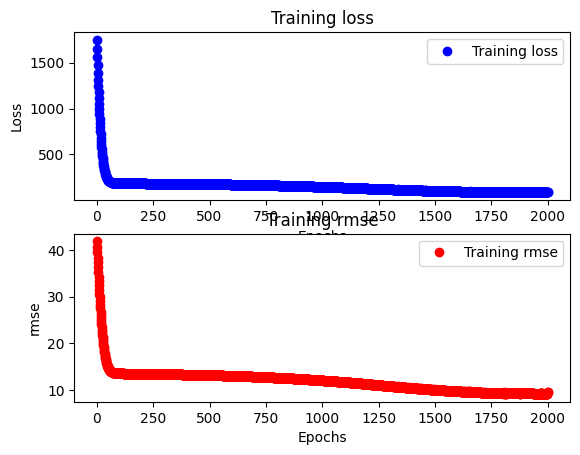

In [14]:
### history에서 loss key를 가지는 값들만 추출
loss = result.history['loss']

### loss그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training rmse')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(dataset, y_data)[1]))
plt.show()